In [72]:
# import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# load the excel data
# three sheets in the excel file
# storage, bigquery and dataflow
# load the data from the storage sheet
storage = pd.read_excel('evaluation.xlsx', sheet_name='storage')
# load the data from the bigquery sheet
bigquery = pd.read_excel('evaluation.xlsx', sheet_name='bigquery')
# load the data from the dataflow sheet
dataflow = pd.read_excel('evaluation.xlsx', sheet_name='dataflow')

In [74]:
# display the data
storage.head()

,Type,File Number,File Size (MB),Size (MB)
0,Original,15,0.045898,0.688477
1,C1,15,46.400000,696.000000
2,C2,200,46.400000,9280.000000
3,C3,400,46.400000,18560.000000


In [75]:
# display the data
bigquery.head()

,Type,Rows,Bytes Processed (MB),Slot milliseconds,Elapsed Time,Slot time consumed
0,Original,10987,0.786934,231,0.9,231
1,C1,10965000,789.510000,105838,7.0,105
2,C2,146200000,10526.720000,1248937,13.0,1248
3,C3,292400000,21053.440000,4187260,10.0,4140


In [76]:
# for the biquery table the Rows column convert them to Rows (in millions)
bigquery['Rows (in millions)'] = bigquery['Rows'] / 1000000

# display the data
bigquery.head()

,Type,Rows,Bytes Processed (MB),Slot milliseconds,Elapsed Time,Slot time consumed,Rows (in millions)
0,Original,10987,0.786934,231,0.9,231,0.010987
1,C1,10965000,789.510000,105838,7.0,105,10.965000
2,C2,146200000,10526.720000,1248937,13.0,1248,146.200000
3,C3,292400000,21053.440000,4187260,10.0,4140,292.400000


In [77]:
# display the data
dataflow.head()

,Type,ReadCSVFile,ConvertToTableRow,InsertBad,InsertGood,Time Elapsed,vCPU,Total memory time (GB hr),Total HDD PD time (GB hr),Memory (GB),HDD PD (GB)
0,Original,8,1,5,8,227,2,0.224,1.493,7.50,50
1,C1,42,40,9,79,387,1,0.274,1.827,3.75,25
2,C2,491,501,8,760,620,7,2.935,19.567,26.25,175
3,C3,933,1025,7,1405,807,8,4.686,31.240,30.00,200


## Storage

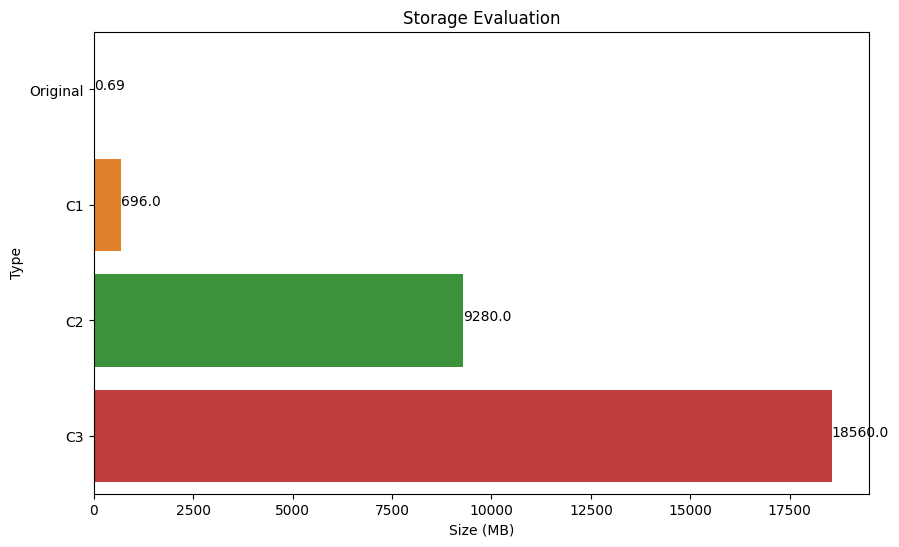

In [78]:
# for the storage data, plot Size (GB) against Type
# add a title to the plot
# add number to the bars and round the numbers to 2 decimal places
plt.figure(figsize=(10, 6))
sns.barplot(x='Size (MB)', y='Type', data=storage)
plt.title('Storage Evaluation')
for i in range(len(storage)):
    plt.text(storage['Size (MB)'][i], i, round(storage['Size (MB)'][i], 2), color='black')

## Bigquery

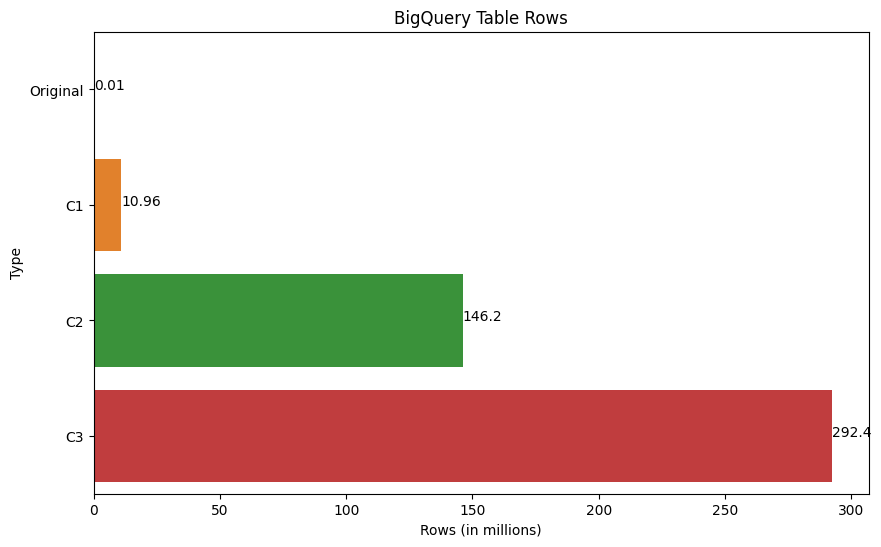

In [79]:
# for the bigquery data plot Rows (in millions) against Type
# add a title to the plot
# add number to the bars and round the numbers to 2 decimal places
plt.figure(figsize=(10, 6))
sns.barplot(x='Rows (in millions)', y='Type', data=bigquery, orient='h')
plt.title('BigQuery Table Rows')
for i in range(len(bigquery)):
    plt.text(bigquery['Rows (in millions)'][i], i, round(bigquery['Rows (in millions)'][i], 2), color='black')

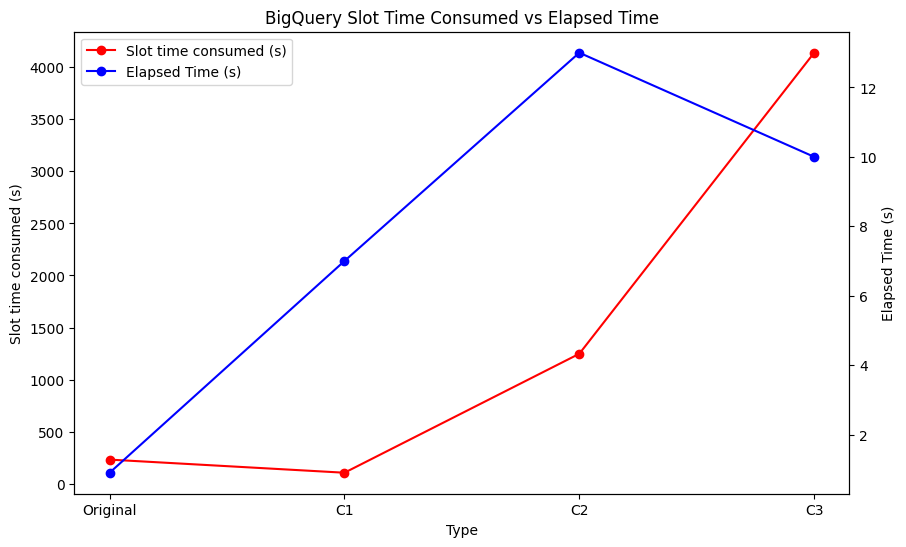

In [90]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Slot time consumed on the primary y-axis
line1, = ax1.plot(bigquery['Type'], bigquery['Slot time consumed'], color='red', marker='o', label='Slot time consumed (s)')
ax1.set_xlabel('Type')
ax1.set_ylabel('Slot time consumed (s)')
ax1.tick_params(axis='y')

# Create a secondary y-axis
ax2 = ax1.twinx()
line2, = ax2.plot(bigquery['Type'], bigquery['Elapsed Time'], color='blue', marker='o', label='Elapsed Time (s)')
ax2.set_ylabel('Elapsed Time (s)')
ax2.tick_params(axis='y')

# Add a title to the plot
plt.title('BigQuery Slot Time Consumed vs Elapsed Time')

# Add a legend
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

# Show the plot
plt.show()

## Dataflow

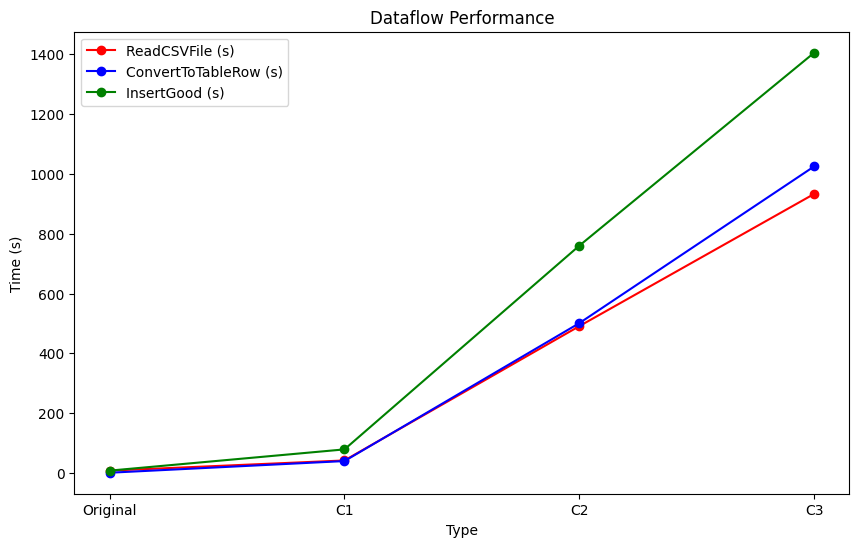

In [93]:
# for the dataflow data
# plot a multiline plot for the dataflow data
# plot the ReadCSVFile, ConvertToTableRow, InsertGood against Type
# add a title to the plot
# use matplotlib to plot the multiline plot

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot ReadCSVFile on the primary y-axis
line1, = ax1.plot(dataflow['Type'], dataflow['ReadCSVFile'], color='red', marker='o', label='ReadCSVFile (s)')

# Plot ConvertToTableRow on the primary y-axis
line2, = ax1.plot(dataflow['Type'], dataflow['ConvertToTableRow'], color='blue', marker='o', label='ConvertToTableRow (s)')

# Plot InsertGood on the primary y-axis
line3, = ax1.plot(dataflow['Type'], dataflow['InsertGood'], color='green', marker='o', label='InsertGood (s)')

ax1.set_xlabel('Type')
ax1.set_ylabel('Time (s)')
ax1.tick_params(axis='y')

# Add a title to the plot
plt.title('Dataflow Performance')

# Add a legend
lines = [line1, line2, line3]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

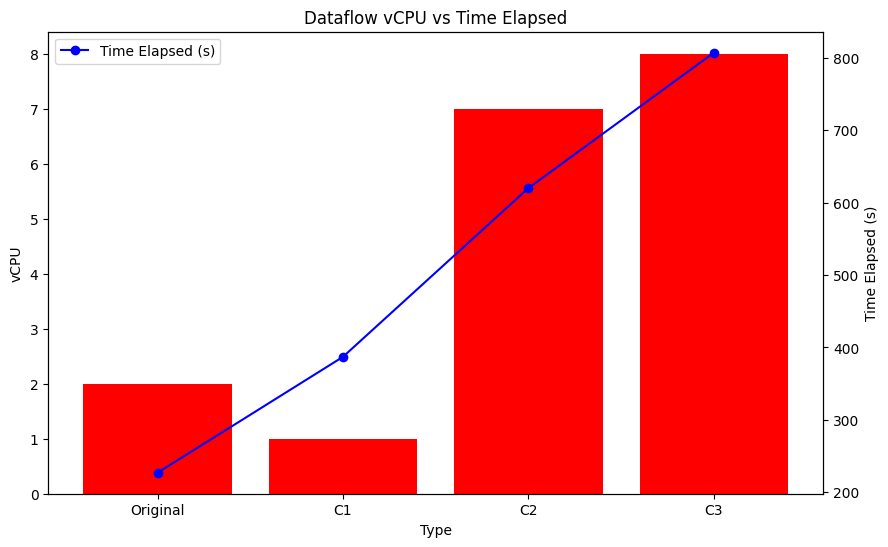

In [96]:
# plot a combo chart with bar plot and line plot
# plot vCPU vs Type as bar
# plot Time Elapsed vs Type as line
# add a title to the plot
# use matplotlib to plot the combo chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot vCPU on the primary y-axis
ax1.bar(dataflow['Type'], dataflow['vCPU'], color='red', label='vCPU')
ax1.set_xlabel('Type')
ax1.set_ylabel('vCPU')
ax1.tick_params(axis='y')

# Create a secondary y-axis
ax2 = ax1.twinx()
line1, = ax2.plot(dataflow['Type'], dataflow['Time Elapsed'], color='blue', marker='o', label='Time Elapsed (s)')
ax2.set_ylabel('Time Elapsed (s)')
ax2.tick_params(axis='y')

# Add a title to the plot
plt.title('Dataflow vCPU vs Time Elapsed')

# Add a legend
lines = [line1]
labels = [line.get_label() for line in lines]
ax2.legend(lines, labels, loc='upper left')


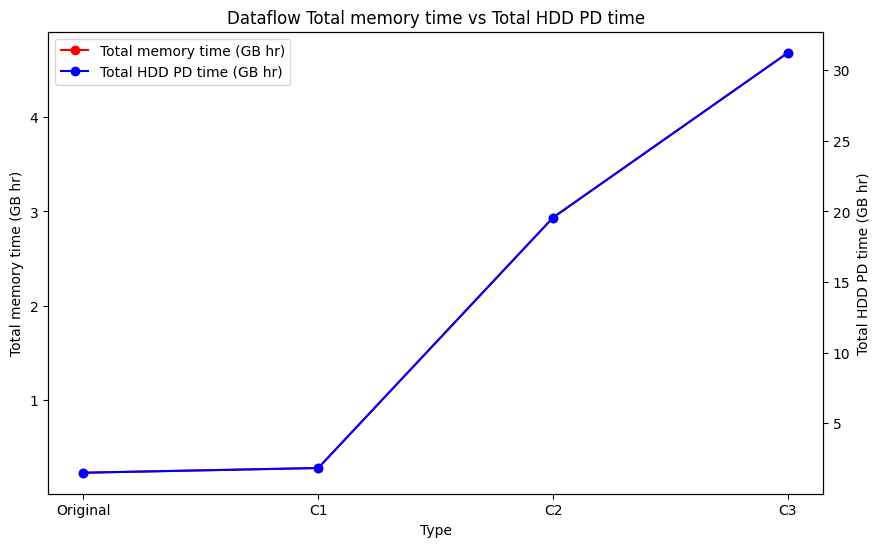

In [95]:
# plot a double line plot 
# plot Total memory time (GB hr) and Total HDD PD time (GB hr) against Type
# add a title to the plot
# use matplotlib to plot the double line plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Total memory time (GB hr) on the primary y-axis
line1, = ax1.plot(dataflow['Type'], dataflow['Total memory time (GB hr)'], color='red', marker='o', label='Total memory time (GB hr)')
ax1.set_xlabel('Type')
ax1.set_ylabel('Total memory time (GB hr)')
ax1.tick_params(axis='y')

# Create a secondary y-axis
ax2 = ax1.twinx()
line2, = ax2.plot(dataflow['Type'], dataflow['Total HDD PD time (GB hr)'], color='blue', marker='o', label='Total HDD PD time (GB hr)')
ax2.set_ylabel('Total HDD PD time (GB hr)')
ax2.tick_params(axis='y')

# Add a title to the plot
plt.title('Dataflow Total memory time vs Total HDD PD time')

# Add a legend
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')